# <center> <u> Optimal Coupon Targeting for Grocery Items </u></center>

## Intro:
In order to develop an optimal coupon targeting stratergy for stores, it is important to look into the likehood of an individual user reordering a product included in the past order. More specifiaclly, it is important to find out those users who might be at the <b>tipping point</b> of reordering a product, and to <b>incentivize</b> them to re-order by sending them targeted coupons. In order to identify these users, I am building a ML model to assign probabilities to the product being reordered by specific user in thier next order, based on thier past behavior. I would then use these probalities as an input for deciding which group to target with coupons for these items, to have maximum <b>persuasive</b> effect.

## The Data :
For this project I used the Instacart data that is available on <a href="https://www.kaggle.com/c/instacart-market-basket-analysis/data">Kaggle.com </a>. The dataset contains information on 3-million+ orders through Instacart in the form of .CSV files.

I setup a relational, SQL-database on postgre to contain all the data and then used Python's Pandas module to perform the analyses.

Th SQL-databse ofthe original features looked as follows:
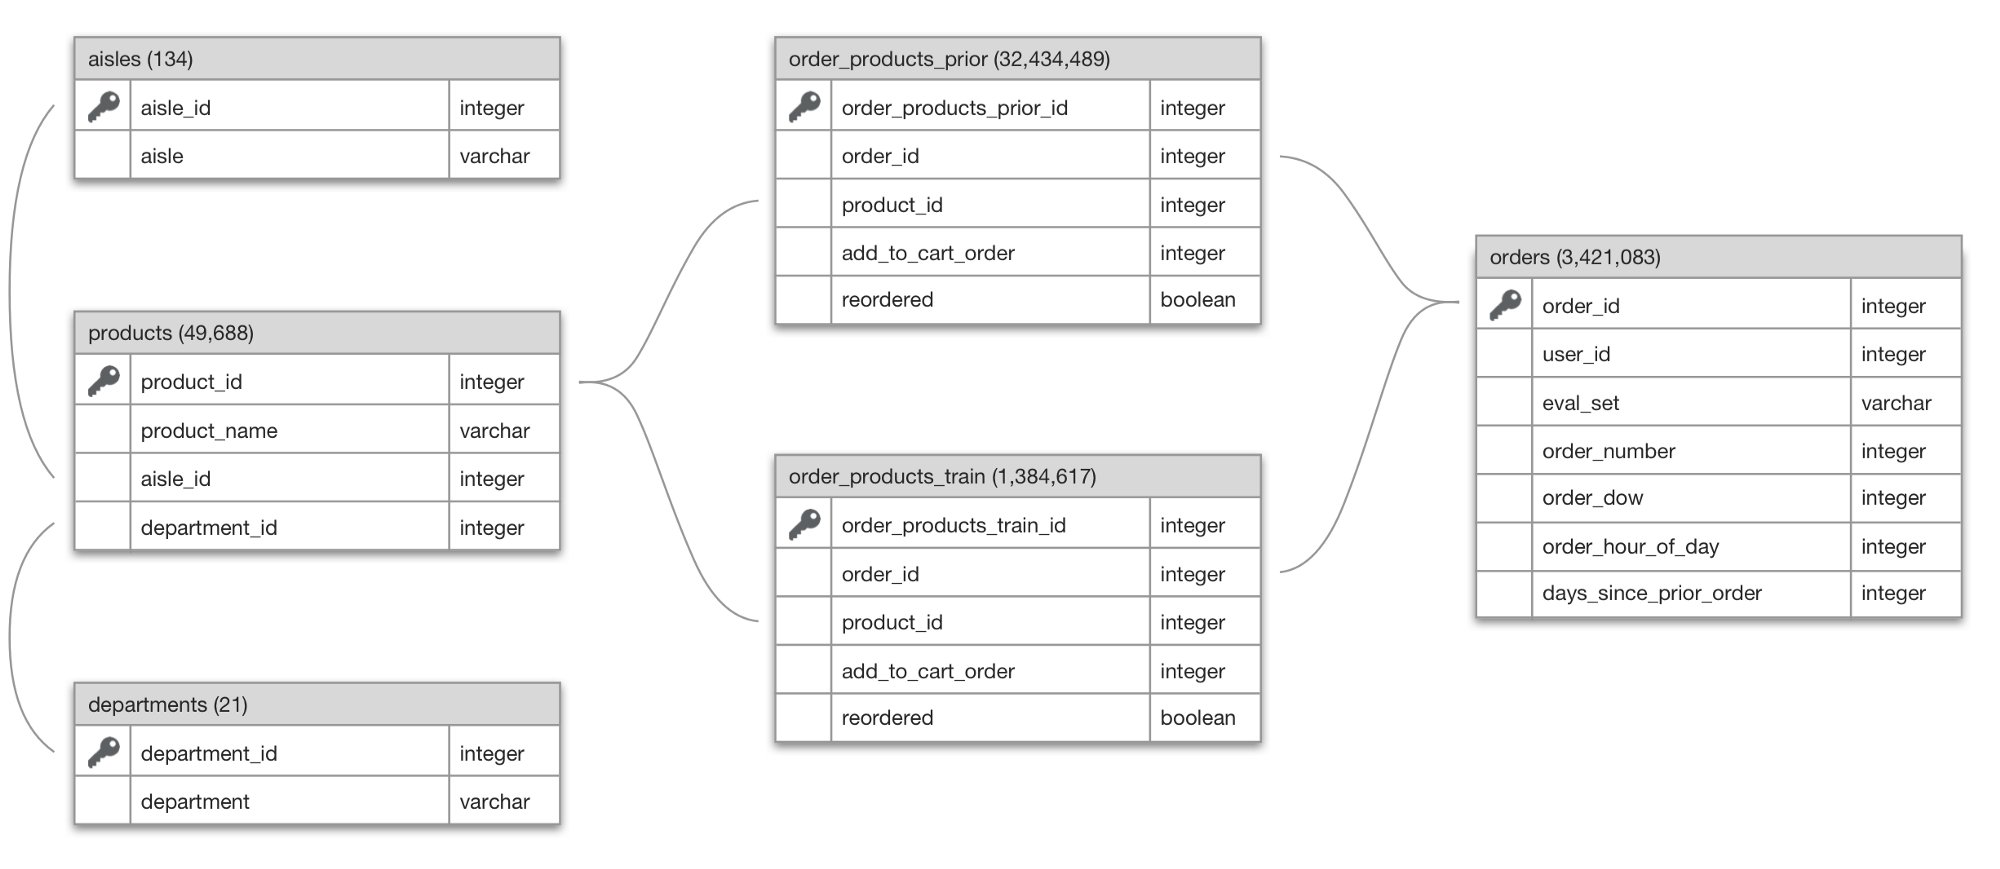

Here the <i> order_products_train </i> consists of the latest cart ordered by users, and thus contains the informtion about whether or not the product was reordered in latest cart. This is our target variable.

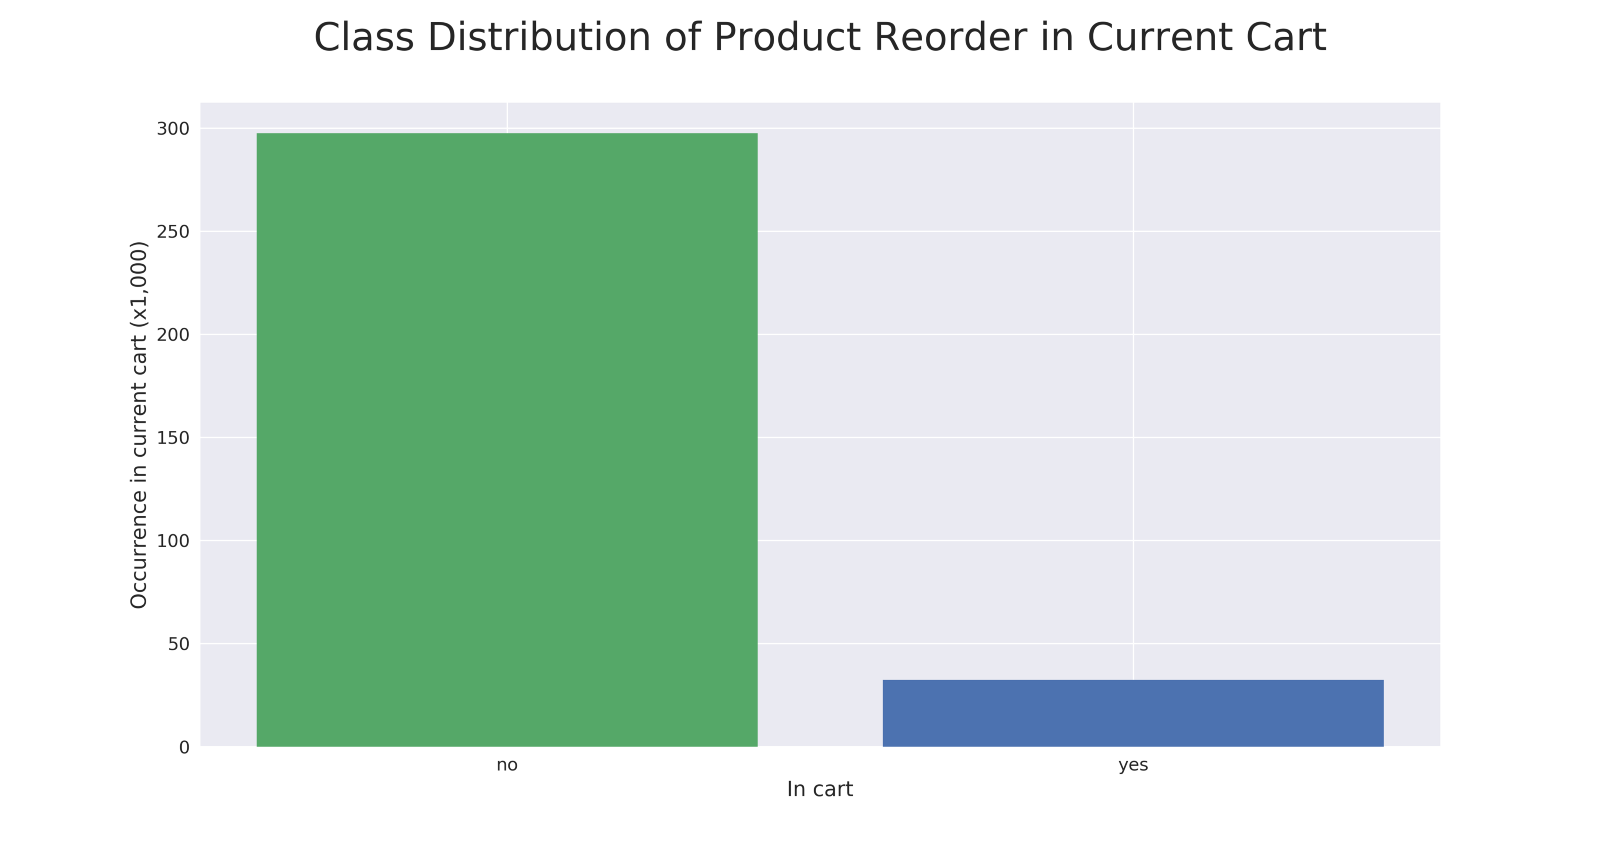

Given that not all products purchased by a user at some point will be reordered, I had to take care of the class imbalance that was present in the data, not to get a predictor that was biased to predicting 'no reorder'. To do this, I used made use of oversampling techinique after making the 80/20 train-test-split.


## Feature Engineering

Feature Engineering plays an important role in ML. So did a lot of feautre engineering to combine and extract meaningfull information from the original features to make the most out of the available data. I roughly created 50+ features to more accurately estimate the probability a user will reorder a product that has been previously ordered in the past.

The features that I created belonged to one of the following 3 categories:
- User Specific 
- Product Specific
- <b>User * Product Specific</b>

Given the nature of the problem, being able to estimate the likelihood a specific users re-orders a specific productm the latter (User * Priduct) turned out be the most revelant option.

Some of the User an User * Product features I created  are as follows:
- user_total_orders: total number of orders placed by the user
- user_days_since_order: used to assign decreasing weights to orders father in past
- user_days_between_orders: mean, mode, last4 and last2
- user_product_orders_share: share of orders that contained the product
- user_cart_new_product_share_mean: the number of times the user has ordered the product since last purchase
- user_product_reorders: the number of times the user has ordered the product since the last purchase
- user_product_days_between_orders: mean, mode, last2, last4
- user_product_cart_rank_mean&mode: the order in which products are added to the cart shows the importnace of the products to the users
- user_product_in_last_order: boolean for whether or not the product was in the previous order
- user_product_streak_current: boolean for whether or not the user is on streak for that product in 2+ of past orders
- user_product_streak_length_current: length of user’s current ordering streak for the product, conditional on product being in previous cart
- user_product_streak_length_latest: length of user’s latest ordering streak for the product
- user_product_days_since_last_order: days since last order of the product

## Modelling: 

For the modellingm I used 3 models:
    - Naive Bayes
    - Logistic Regression
    - Random Forest

Given the objective to get the relative likelihoods among users reordering a specific product, rather than 0-1 predictions about reorders, I did not use the regular scoring method for this dataset being <b>F1 socre</b>. Instead I used <b>ROC-AUC</b>, which combines <b>Specificity and Precision</b>, giving me an indication of the probability that a randomly chosen reordered product by a user will be ranked higher by the model than non-ordered product by a user.
Out of the three models, <b> Random Forest Classifier </b> performed the best, both on the validation and the test set, with a test AUC of <b> 82.4%</b>. This means that the model will rank a randomly chosen model positve instance(reordered) higher than a randomly chosen negative one(non-ordered) 82.4% of the time. Further tweking to the model can increase the AUC, but me the primary excercise was feature engineering and working with large, relational data.


## Business Product:
The results of this model can serve as input to the marketing team of various suppliers on Instacart. In practice, it would come down to the store selecting a specific product, and for that product looking at the probabilities for each user if reordering that particular product. The store would then seelct the users in the middle, say, 20% of the ranked probabilities of reorder for that product, see what kind of coupon would make most sense and would result in the highest increse in profits, taking into account various factors like the conversion rate, e.g. offering a coupon reduces revenue per product sold with that coupon, but might offset that by a quantitaive increase in the number of products sold if the coupon has the intended effect on the increasing sales.

The end product would be a dash board that the business decision makers in the store can find the product, access the number of 'target' users for each point. 
Something similar to this:
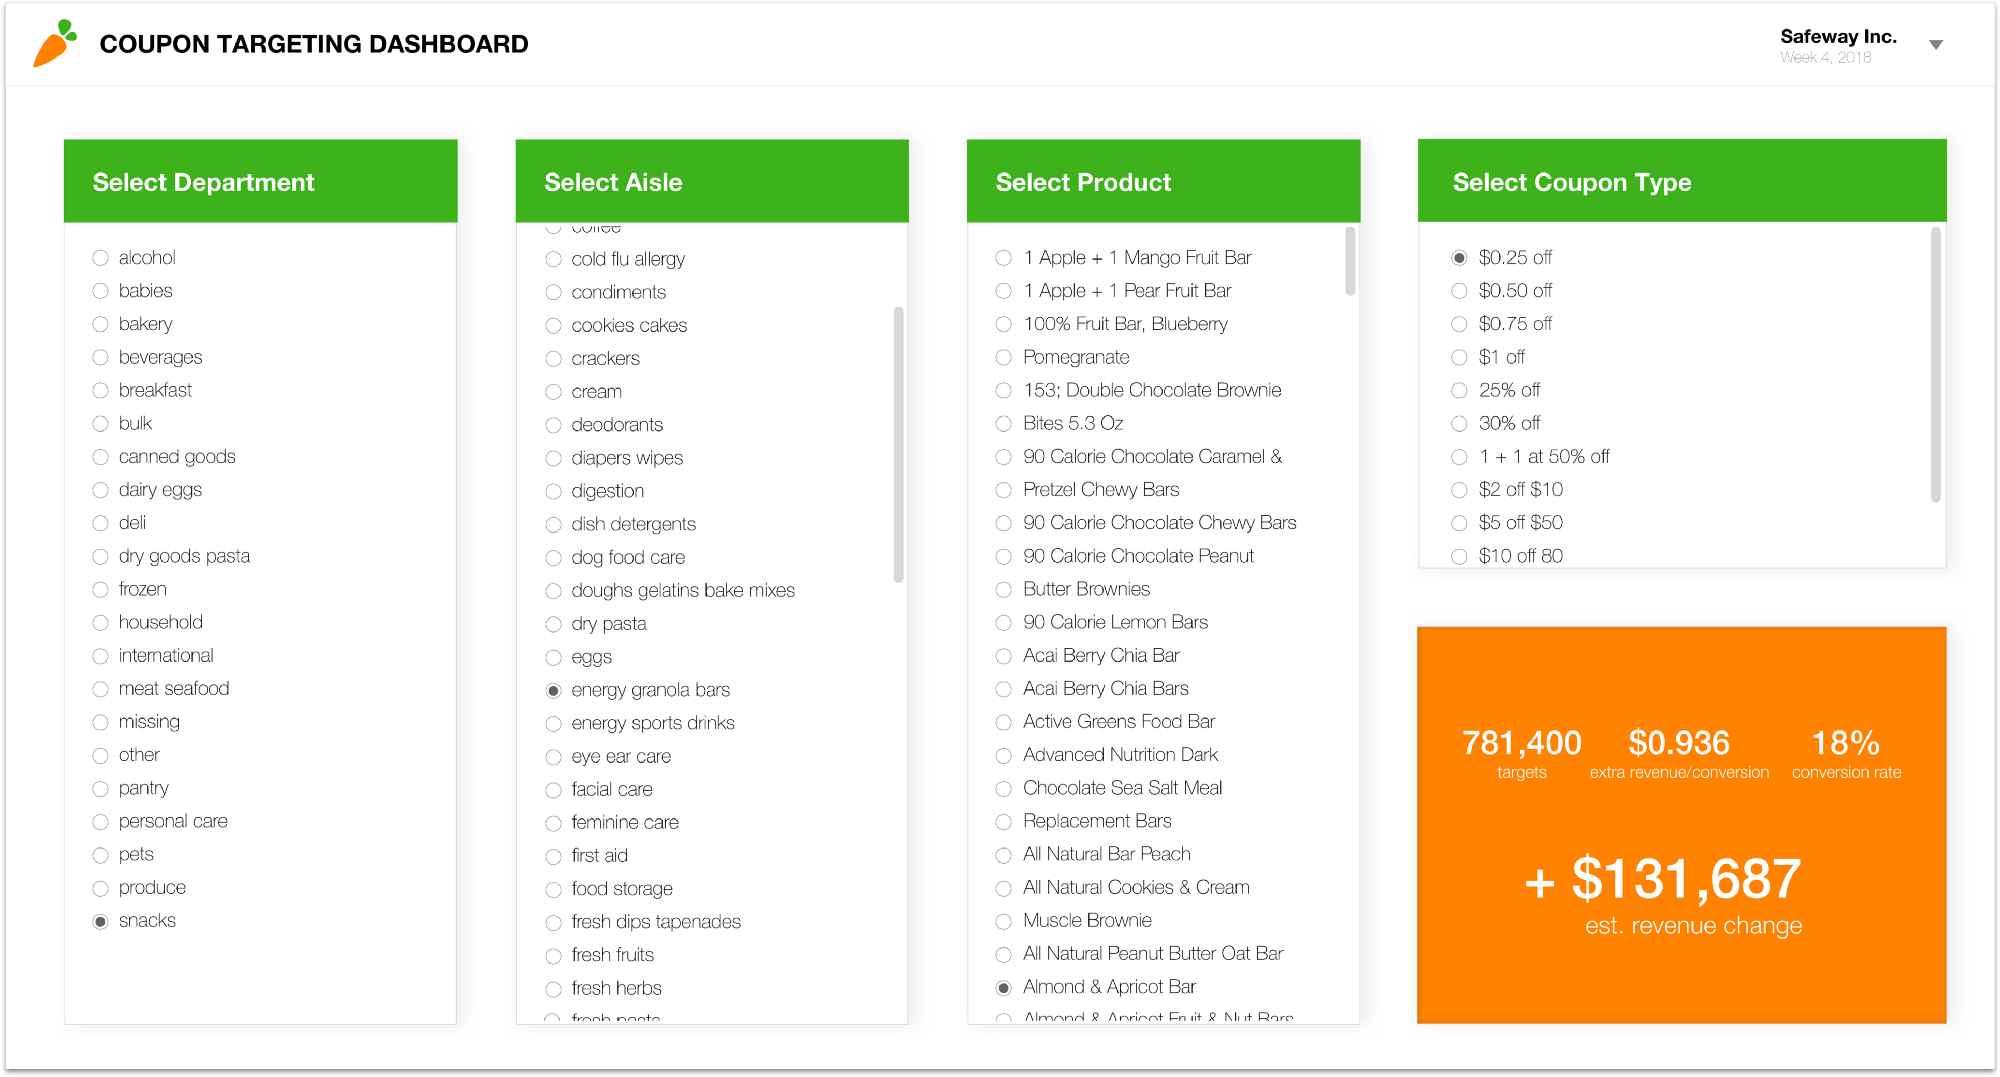

Supplementing the available data with the inventories, product prices and the coupon details, this dashboard would ultimately help  marketers find the optimal product, targets and the coupon combination for their marketing efforts to ultimately increase the sales and profitability of the company.
